In [3]:
import numpy as np
#import pandas as pd
import scipy.optimize as optimization
import matplotlib.pyplot as plt

In [4]:
#Mért adatok beolvasása
szog = np.array([30.,40.,50.,60.,70.,80.,90.,100.,110.])
ch =np.array([8.9730e+01, 82.305,74.374,66.148,60.631,54.489,50.916,46.6247,42.805])
ch_err=np.array([3.7380e-01,3.6105e-01,4.2373e-01,4.2954e-01,2.4439e-01,3.3175e-01,3.7857e-01,1.8966e-01,1.9500e-01])

In [5]:
#Elméleti energiák kiszámolása a Compton-formulából
def Compton(x):
    return (661.659/(1+1.2952*(1-np.cos(x/180*np.pi))))
en_th= Compton(szog)
en_th

array([563.82234881, 507.78912626, 452.36646036, 401.58958485,
       357.22570959, 319.5971186 , 288.27945277, 262.55172636,
       241.64149731])

array([0.14584507, 8.08747901])

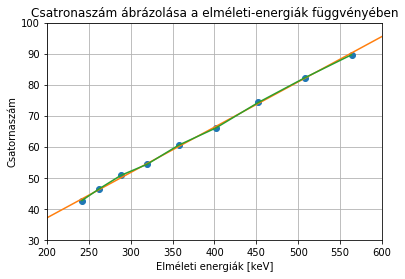

In [6]:
# Kalibrációs egyenes és kalibrációs paraméterek
def en_to_ch(x,a,b):
    return a*x+b
#Fv-illesztés
par0=[1,1]
par, cov=optimization.curve_fit(en_to_ch,en_th,ch,par0,ch_err)
perr=np.sqrt(np.diag(cov))
en_scale=np.array(np.linspace(200.,600.,1000))
# Kalibráció //Csatronaszám ábrázolása a elméleti-energiák függvényében
plt.plot(en_th,ch,'o',en_scale,en_to_ch(en_scale,*par))
plt.errorbar(en_th, ch, yerr=ch_err)
plt.title('Csatronaszám ábrázolása a elméleti-energiák függvényében')
plt.xlabel('Elméleti energiák [keV]')
plt.ylabel('Csatornaszám')
plt.xlim(200,600)
plt.ylim(30,100)
plt.grid(1)
plt.savefig('Kalib.png')
par

In [7]:
b_rel_err=perr[1]/par[1]
a_err, b_err = perr
print(a_err, b_err)

b = par[1]
a = par[0]
a_rel_err = perr[0]/par[0]

b_a_err = b_err/a + b/a**2*a_err #b/a hibája

print(1./a, 1/a * a_rel_err)
print(-b/a ,b_a_err)




0.0016701411550860102 0.5750509319126788
6.8565908327596405 0.07851807530713552
-55.4525344486153 4.577902234171909


In [8]:
def ch_to_en(x):
    return (x-b)/a

In [9]:
en_meas = ch_to_en(ch)
en_meas_err = ch_err /a
en_meas_syst_err = np.sqrt((ch_err/a**2*a_err)**2 + b_a_err**2)
en_meas_err

for i in range(0, en_meas.size):
    print(en_th[i], en_meas[i], en_meas_err[i])


563.822348808657 559.7893609749073 2.5629936532855537
507.78912626424193 508.87917404166694 2.475572120167868
452.3664603589117 454.49955214705017 2.9053432335652425
401.58958485069195 398.0972359567694 2.945180026303576
357.2257095880586 360.2694243324345 1.6756822336181285
319.59711859845595 318.15624343762477 2.274674008768011
288.2794527710004 293.6576443921746 2.595699591557817
262.55172636137087 264.2339561515531 1.3004210173411934
241.6414973149238 238.04383614766112 1.33703521238813


In [10]:
eps = 0.0
chi_sq = (en_meas - en_th+ eps*en_meas_syst_err)**2/en_meas_err**2
chi_sq.sum()

print(chi_sq)

[2.47604631 0.19388308 0.53904397 1.40608494 3.29932096 0.40124938
 4.29302765 1.67341123 7.24027108]


In [31]:
from scipy.stats import chi2 as chi2

In [35]:
df=7
p = chi2.cdf(chi_sq.sum(), df)
conf_lev = 1-p
conf_lev

0.0030692937887331073

In [22]:
chi_sq_inv = (ch - en_to_ch(en_th, a, b))**2/ch_err**2
chi_sq_inv.sum()

21.522338598680324

In [23]:
en_to_ch(en_th, a, b)

array([90.31819141, 82.1460219 , 74.06289907, 66.65734188, 60.1870892 ,
       54.69914455, 50.13161724, 46.37935507, 43.32970116])

In [24]:
chi_sq_inv

array([2.47604631, 0.19388308, 0.53904397, 1.40608494, 3.29932096,
       0.40124938, 4.29302765, 1.67341123, 7.24027108])

In [25]:
ch

array([89.73  , 82.305 , 74.374 , 66.148 , 60.631 , 54.489 , 50.916 ,
       46.6247, 42.805 ])

In [26]:
ch_err

array([0.3738 , 0.36105, 0.42373, 0.42954, 0.24439, 0.33175, 0.37857,
       0.18966, 0.195  ])

In [27]:
ch-en_to_ch(en_th, a, b)

array([-0.58819141,  0.1589781 ,  0.31110093, -0.50934188,  0.4439108 ,
       -0.21014455,  0.78438276,  0.24534493, -0.52470116])